# Метрики precision и recall

Данные содержат признаки пользователей и целевую переменную affair - была ли связь на стороне

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv( 'affair_data.csv' )
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affair           6366 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 447.7 KB


In [4]:
from sklearn.linear_model import LogisticRegression

# импортируем метод для автоматической разбивки на обучающую и тестовую выборки
# раньше использовали from sklearn.cross_validation import train_test_split  
from sklearn.model_selection import train_test_split

Формируем набор признаков и целевую переменную

In [15]:
X=data
X=pd.get_dummies(X,columns=['rate_marriage','occupation','occupation_husb'])

In [16]:
del X['affair']

Разбиваем данные на обучающую и тестовую выборки в соотношении 70 / 30

In [17]:
y=data['affair']

In [19]:
model=LogisticRegression()

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.35,random_state=0)

Обучаем модель

In [21]:
model.fit(X_train,y_train)

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Получаем прогнозные значения модели (переменная predictions)

In [22]:
prediction=model.predict_proba(X_test)

In [23]:
for line in zip( prediction[:, 1], y_test ):
    print( line )

(0.689536140389748, 0)
(0.08396320832400775, 0)
(0.2744171179861355, 0)
(0.2619726237740469, 0)
(0.2597340454875184, 1)
(0.15083362527452582, 0)
(0.181229783496317, 0)
(0.2142863833476587, 0)
(0.7813796708058891, 1)
(0.31250405409256593, 0)
(0.10079319998864233, 0)
(0.19068114590200413, 0)
(0.07540301194116505, 0)
(0.26730114049657544, 0)
(0.7188806426902059, 1)
(0.628053862771767, 0)
(0.2748228035183309, 0)
(0.703177583839152, 1)
(0.2968052308871348, 0)
(0.15682934490298103, 0)
(0.20849639872534803, 1)
(0.4366504760250338, 1)
(0.08208225453748759, 1)
(0.4568059865841502, 1)
(0.14454849814479265, 0)
(0.1552808658716307, 0)
(0.4074981797982785, 0)
(0.34435583117289564, 0)
(0.2666900807017756, 0)
(0.16426923339799882, 0)
(0.1305080780148938, 0)
(0.3086880337616943, 1)
(0.20258126926058506, 0)
(0.5393145568873176, 1)
(0.6564848928908885, 1)
(0.42848095665554575, 1)
(0.11734256440585515, 0)
(0.1608164541354386, 0)
(0.3205401735997564, 1)
(0.139412477776184, 0)
(0.37275413254832757, 1)
(0.2

In [24]:
model.score(X_test, y_test)

0.7353073126962764

### Упражнение

Постройте набор моделей для значений random_state от 0 до 9. Получите model.score для каждого варианта.

In [25]:
for i in range(0, 11):
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.35,random_state=i)
    model.fit(X_train,y_train)
    print(model.score(X_test, y_test))

c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

0.7353073126962764
0.7249887842081651
0.724540152534769
0.7236428891879767
0.7115298340062809
0.721399730820996
0.7178106774338269
0.7267833109017496
0.7267833109017496
0.7191565724540152
0.721399730820996


c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Kirilll\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

### Оценка качества модели

Считаем accuracy последней модели

In [26]:
tp = 0 # True positive
fp = 0 # False positive
fn = 0 # False negative
tn = 0 # True negative

predictions = model.predict_proba( X_test )
for predicted_prob, actual in zip( predictions[:, 1], y_test ):
    print(predicted_prob,actual)

    if predicted_prob>0.5:
        predicted=1
    else:
        predicted=0

    if predicted==1:
        if actual==1:
            tp+=1
        else:
            fp+=1
    else:
        if actual==1:
            fn+=1
        else:
            tn+=1

0.257004935163243 0
0.30805933657247253 0
0.6190464798950863 0
0.06240684410062288 0
0.6618408731781574 1
0.42295108147418176 1
0.22584379945730362 1
0.7785181711951659 0
0.29604872018666256 1
0.07217457151932681 0
0.5468829635567065 1
0.5669973965629025 1
0.373033076100953 1
0.52736332881517 0
0.31413317611748315 1
0.070807532786612 0
0.5707532329330738 1
0.30729038731669267 0
0.12734067069526334 1
0.2946451816126808 0
0.19807837231010045 0
0.08530685839352978 0
0.12112965538335721 0
0.30379657175065294 1
0.6248330996344843 1
0.09940150690277957 0
0.23511727991415635 0
0.5177742392599183 0
0.37187399741670046 1
0.28042589118858285 1
0.4058072317286354 1
0.4358998655069596 0
0.2560795411836782 0
0.09315804580268403 0
0.0721398316103835 0
0.8556403327877938 1
0.32900340205003514 1
0.2685891711169135 0
0.39913100076813834 0
0.08686602676352026 1
0.5686322505322059 0
0.11913901340909884 0
0.2963664951325965 0
0.12706463635169993 1
0.2907445648132046 0
0.24110230895615856 1
0.4179139965924

In [27]:
# какая точность получилась?
(tp + tn) / (tp + fp + fn + tn)

0.721399730820996

In [29]:
precision = tp / (tp + fp)
precision

0.6401869158878505

### Используем готовые библиотеки

In [30]:
# метод для построения графика precision-recall
from sklearn.metrics import precision_recall_curve

In [31]:
pr, re, thres = precision_recall_curve( y_test, predictions[:, 1] )

In [32]:
# посмотрим что получилось
for line in zip( pr, re, thres ):
    print( line )

(0.33243606998654107, 1.0, 0.0444593697381386)
(0.33258527827648116, 1.0, 0.04484685485516096)
(0.33273462056578357, 1.0, 0.04933778750471255)
(0.33243486073674755, 0.9986504723346828, 0.049424601475487676)
(0.3325842696629214, 0.9986504723346828, 0.04997239568112761)
(0.3327338129496403, 0.9986504723346828, 0.05037637657130831)
(0.3324336482231219, 0.9973009446693657, 0.05054613761283654)
(0.3325832583258326, 0.9973009446693657, 0.051177096260557546)
(0.33273300315173343, 0.9973009446693657, 0.051443905482277924)
(0.33288288288288287, 0.9973009446693657, 0.05192507812406475)
(0.33303289770166744, 0.9973009446693657, 0.05209263931755432)
(0.33318304779080254, 0.9973009446693657, 0.05299877822532554)
(0.3333333333333333, 0.9973009446693657, 0.053076396982444755)
(0.3334837545126354, 0.9973009446693657, 0.05393718959158643)
(0.33363431151241535, 0.9973009446693657, 0.05453011051126812)
(0.33378500451671184, 0.9973009446693657, 0.05501272024653085)
(0.33393583370989605, 0.9973009446693657

In [28]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


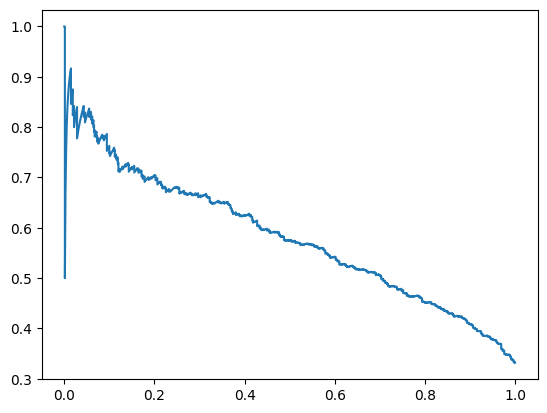

In [34]:
import matplotlib.pyplot as plt
plt.plot( re, pr )


In [35]:
from sklearn.metrics import average_precision_score

In [37]:
# площадь под кривой
average_precision_score( y_test, predictions[:, 1] )

0.5818171632067943

### ROC

In [38]:
# посчитаем ROC-кривую (Receiver Operating Characteristic)
from sklearn.metrics import roc_curve

In [40]:
# получаем значения false и true positive rate для различных значений порога
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )

In [41]:
for line in zip( fpr, tpr, thres ):
    print( line )

(0.0, 0.0, 1.9220826448095658)
(0.0, 0.001349527665317139, 0.9220826448095657)
(0.0006720430107526882, 0.001349527665317139, 0.8929939733206671)
(0.0006720430107526882, 0.014844804318488529, 0.8556403327877938)
(0.0013440860215053765, 0.014844804318488529, 0.8530727372165926)
(0.0013440860215053765, 0.018893387314439947, 0.8455002881754241)
(0.0020161290322580645, 0.018893387314439947, 0.8420386024015543)
(0.0020161290322580645, 0.021592442645074223, 0.8291443184087836)
(0.002688172043010753, 0.021592442645074223, 0.828559782697037)
(0.002688172043010753, 0.02834008097165992, 0.8180009767584853)
(0.004032258064516129, 0.02834008097165992, 0.8152848624482909)
(0.004032258064516129, 0.043184885290148446, 0.7980532893398121)
(0.004704301075268817, 0.043184885290148446, 0.7957348307653743)
(0.004704301075268817, 0.04588394062078273, 0.7941800846204057)
(0.005376344086021506, 0.04588394062078273, 0.7929189437843365)
(0.005376344086021506, 0.0553306342780027, 0.7808649783752004)
(0.006048387

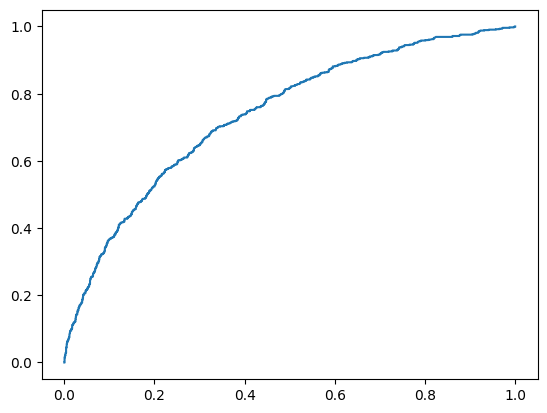

In [42]:
plt.plot( fpr, tpr )

**Построим еще одну модель и сравним их между собой**

In [43]:
Xshort = X.loc[ :, ['age', 'children'] ]
Xshort.head()

,age,children
0,32.0,3.0
1,27.0,3.0
2,22.0,0.0
3,37.0,4.0
4,27.0,1.0


In [44]:
model2 = LogisticRegression()

In [46]:
X_train_short, X_test_short, Y_train, Y_test = train_test_split( Xshort, y, test_size = 0.3, random_state = 0 )

In [47]:
model2.fit( X_train_short, Y_train )

LogisticRegression()

In [48]:
predictions2 = model2.predict_proba( X_test_short )

In [49]:
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )

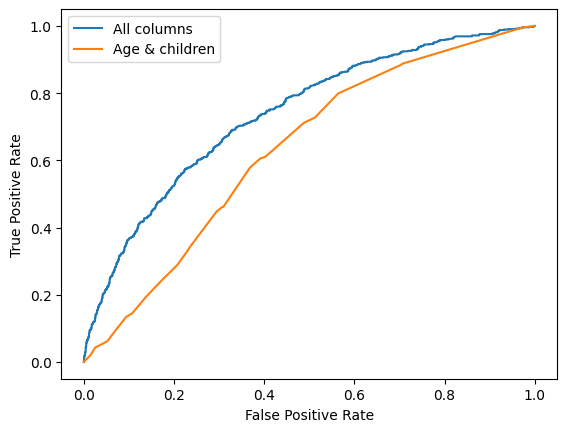

In [50]:
plt.plot( fpr, tpr, label = 'All columns' )
plt.plot( fpr2, tpr2, label = 'Age & children' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Посчитаем площадь под ROC-кривой для двух моделей**

In [51]:
from sklearn.metrics import roc_auc_score

In [53]:
roc_auc_score( y_test, predictions[:, 1] )

0.737513694803593

In [54]:
roc_auc_score( Y_test, predictions2[:, 1] )

0.6311452091928271

Можно посчитать с помощью более общего метода auc

Про разницу между ними https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc

In [56]:
from sklearn.metrics import auc

In [57]:
auc( fpr, tpr )

0.737513694803593

In [58]:
auc( fpr2, tpr2 )

0.6311452091928271

## Пример влияния L1 и L2-регуляризации

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
predictions = model1.predict_proba( X_test )

In [ ]:
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
predictions2 = model2.predict_proba( X_test )

In [ ]:
model3 = LogisticRegression( penalty = 'l1', C = 0.001 ).fit( X_train, Y_train )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()

**Построим еще одну модель, используя другие признаки**

In [ ]:
Xshort = pd.get_dummies( data.loc[ :, ['age', 'children'] ], columns = ['age', 'children'] )
Xshort.head()

In [ ]:
Y = data['affair']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( Xshort, Y, test_size = 0.3, random_state = 0 )

In [ ]:
model1 = LogisticRegression( penalty = 'l1', C = 0.01 ).fit( X_train, Y_train )
model2 = LogisticRegression( penalty = 'l2', C = 0.01 ).fit( X_train, Y_train )
model3 = LogisticRegression( penalty = 'l2', C = 1 ).fit( X_train, Y_train )

In [ ]:
predictions = model1.predict_proba( X_test )
predictions2 = model2.predict_proba( X_test )
predictions3 = model3.predict_proba( X_test )

In [ ]:
fpr, tpr, thres = roc_curve( Y_test, predictions[:, 1] )
fpr2, tpr2, thres2 = roc_curve( Y_test, predictions2[:, 1] )
fpr3, tpr3, thres3 = roc_curve( Y_test, predictions3[:, 1] )

In [ ]:
plt.plot( fpr, tpr, label = 'l1' )
plt.plot( fpr2, tpr2, label = 'l2' )
plt.plot( fpr3, tpr3, label = 'C=1' )

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend( loc = 0 )
plt.show()